Init Coords
[-0.16454391] [0.6790062]
[0.23315479] [1.0148093]
[-0.34015036] [0.04718051]
[-0.36429033] [-0.5956917]
Step 0: loss_history = 2.0892367362976074
Step 100: loss_history = -2.165029525756836
Step 200: loss_history = -2.92055344581604
Step 300: loss_history = -3.4454903602600098
Step 400: loss_history = -3.8744537830352783
Step 500: loss_history = -4.2464776039123535
Step 600: loss_history = -4.576953887939453
Step 700: loss_history = -4.873453617095947
Step 800: loss_history = -5.140908718109131
Step 900: loss_history = -5.383307456970215
Step 1000: loss_history = -5.604104995727539
Step 1100: loss_history = -5.806281089782715
Step 1200: loss_history = -5.99236536026001
Step 1300: loss_history = -6.1644816398620605
Step 1400: loss_history = -6.324406623840332
Step 1500: loss_history = -6.421234607696533
Step 1600: loss_history = -6.421473979949951
Step 1700: loss_history = -6.42186975479126
Step 1800: loss_history = -6.422523498535156
Step 1900: loss_history = -6.4236025810

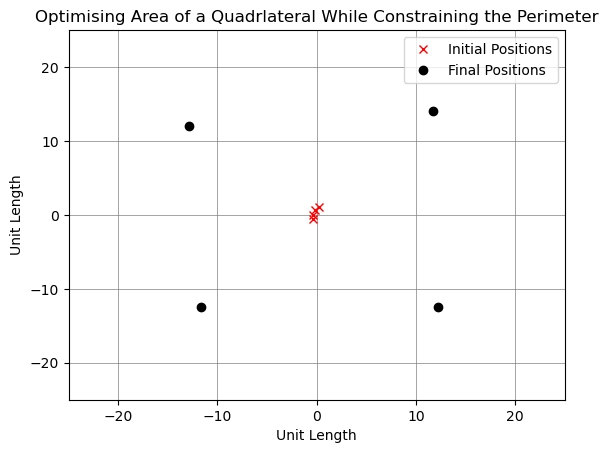

In [3]:
# Import packages 
import torch
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torch import sqrt
import numpy as np

# create random initial coordinates
x1 = Variable(torch.randn(1)*1, requires_grad=True)
y1 = Variable(torch.randn(1)*1, requires_grad=True)
x2 = Variable(torch.randn(1)*1, requires_grad=True)
y2 = Variable(torch.randn(1)*1, requires_grad=True)
x3 = Variable(torch.randn(1)*1, requires_grad=True)
y3 = Variable(torch.randn(1)*1, requires_grad=True)
x4 = Variable(torch.randn(1)*1, requires_grad=True)
y4 = Variable(torch.randn(1)*1, requires_grad=True)

plt.plot(x1.detach().numpy(), y1.detach().numpy(), 'x', color='red', label="Initial Positions")
plt.plot(x2.detach().numpy(), y2.detach().numpy(), 'x', color='red')
plt.plot(x3.detach().numpy(), y3.detach().numpy(), 'x', color='red')
plt.plot(x4.detach().numpy(), y4.detach().numpy(), 'x', color='red')

# Plot random initial coordinates
print("Init Coords")
print(x1.detach().numpy(),y1.detach().numpy())
print(x3.detach().numpy(),y3.detach().numpy())
print(x2.detach().numpy(),y2.detach().numpy())
print(x4.detach().numpy(),y4.detach().numpy())

# Define the function area function
def compute_area(x1, y1, x2, y2, x3, y3, x4, y4):

    return 0.5*(torch.abs(x1*y2 -x1*y4 -x3*y2 + x3*y4 -y1*x2 +y1*x4 +y3*x2 -y3*x4))
  
# Define the function perimeter function
def compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4):
   
    s1 = torch.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    s2 = torch.sqrt((x3 - x2)**2 + (y3 - y2)**2)
    s3 = torch.sqrt((x4 - x3)**2 + (y4 - y3)**2)
    s4 = torch.sqrt((x1 - x4)**2 + (y1 - y4)**2)
    return s1 + s2 + s3 + s4

# Define the optimizer and hyper-parameters
optimizer = optim.RMSprop([x1, y1, x2, y2, x3, y3, x4, y4], lr=.01)

# Number of iterations 
steps =10000

# perimeter constraint...limmited to 100 units
max_perimeter = 100

#collecting the value of the loss function for each interation 
loss_history = []

# Optimization loop
for step in range(steps):
    
    area = compute_area(x1, y1, x2, y2, x3, y3, x4, y4)
    
    perimeter = compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4)
    
    perimeter_penalty = (torch.max(torch.tensor(0.), ((perimeter)**2 - (max_perimeter)**2)**1)) #hmmmm
    
    # loss function
    loss = (torch.log(1/area) + perimeter_penalty**1)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    # Update parameters
    optimizer.step()

    loss_history.append(loss.item())

    if step % 100 == 0:
        print(f'Step {step}: loss_history = {loss.item()}') # Prints a value for loss function once every hundred iterations

# optomised coords
optimized_x1 = x1.item()
optimized_y1 = y1.item()
optimized_x2 = x2.item()
optimized_y2 = y2.item()
optimized_x3 = x3.item()
optimized_y3 = y3.item()
optimized_x4 = x4.item()
optimized_y4 = y4.item()

# compute optimized area 
dele=compute_area(x1, y1, x2, y2, x3, y3, x4, y4).item()

# Print the optimized coordinates, area, and perimeter..
print("Optimized Coordinates:")
print("Vertex 1: ({}, {})".format(optimized_x1, optimized_y1))
print("Vertex 2: ({}, {})".format(optimized_x2, optimized_y2))
print("Vertex 3: ({}, {})".format(optimized_x3, optimized_y3))
print("Vertex 4: ({}, {})".format(optimized_x4, optimized_y4))
print("Optimized Perimeter: {:.4f}".format(compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4).item()))
print("Optimized Area: {:.4f}".format(compute_area(x1, y1, x2, y2, x3, y3, x4, y4).item()))
print("Theoretical maximum = 625")

# Plot optimized coordinates
plt.plot(x1.item(), y1.item(), 'o', color='black', label="Final Positions")
plt.plot(x2.item(), y2.item(), 'o', color='black')
plt.plot(x3.item(), y3.item(), 'o', color='black')
plt.plot(x4.item(), y4.item(),'o', color='black')
plt.title("Optimising Area of a Quadrlateral While Constraining the Perimeter")
plt.xlabel("Unit Length")
plt.ylabel("Unit Length")
plt.legend()
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.xlim(-25, 25)
plt.ylim(-25, 25)
plt.savefig("4_points_init_final_positions_RMSprop_10000its_lr0.01.pdf")


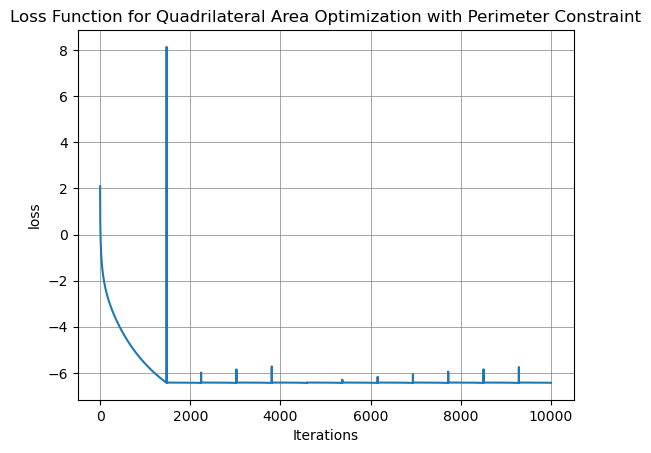

In [4]:
plt.plot(loss_history)
plt.title("Loss Function for Quadrilateral Area Optimization with Perimeter Constraint")
plt.xlabel("Iterations")
plt.ylabel("loss")
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.savefig("4_points_loss_history_RMSprop_10000its_lr0.01.pdf")
